### MINI-Project-3

#### Where is the data
https://data.cityofnewyork.us/Housing-Development/apartment-cost-list/wnmh-ssrd/about_data

In [1]:
import pandas as pd
import numpy as np
from runEDAFunctions import *
from RunAllRegressionMLs import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
import importlib
import runEDAFunctions 
import runAllRegressionsVer1

importlib.reload(runEDAFunctions)
importlib.reload(runAllRegressionsVer1)


<module 'runAllRegressionsVer1' from '/Users/pnandan/Documents/Data-Science-Project/Mini-Project-3/runAllRegressionsVer1.py'>

In [2]:
## Read the CSV
ny_df = pd.read_csv('apartment_cost_list_20240814.csv')

In [3]:
ny_df.shape

(19601, 18)

In [4]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19601 entries, 0 to 19600
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19601 non-null  int64 
 1   Borough                 19601 non-null  object
 2   House #                 19601 non-null  object
 3   Street Name             19601 non-null  object
 4   Block                   19601 non-null  int64 
 5   Lot                     19601 non-null  int64 
 6   Bin #                   19601 non-null  int64 
 7   Job Type                19601 non-null  object
 8   Community - Board       19601 non-null  int64 
 9   Curb Cut                16 non-null     object
 10  Fully Permitted         15633 non-null  object
 11  Initial Cost            19601 non-null  object
 12  Proposed Zoning Sqft    19601 non-null  int64 
 13  Horizontal Enlrgmt      163 non-null    object
 14  Vertical Enlrgmt        242 non-null    object
 15  En

In [5]:
ny_df.head(10)

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
1,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
2,302000974,BROOKLYN,501,HICKS STREET,321,7501,3003731,A2,306,NaN,12/12/2005,$40000.00,0,NaN,NaN,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...
3,302002990,BROOKLYN,334,MILFORD STREET,4056,145,3393496,A1,305,NaN,01/06/2006,$65000.00,0,NaN,NaN,0,R6,Proposed convert 1 Duplex apartment (UG.J3) i...
4,302008645,BROOKLYN,611,HANCOCK STREET,1656,59,3045842,A1,303,NaN,11/28/2005,$50000.00,0,NaN,NaN,0,R5,APPLICATION FILED TO CONVERT FROM 2 FAMILY TO ...
5,141002313,MANHATTAN,242,EAST 19 STREET,899,32,1019591,A2,106,NaN,06/23/2021,$44000.00,0,NaN,NaN,0,R9A,STRUCTURAL WORK FOR NEW CONVENIENCE STAIR IN C...
6,302022656,BROOKLYN,6,2 STREET,460,2,3007811,A2,306,NaN,04/23/2008,$60000.00,0,NaN,NaN,0,NaN,RENOVATE EXISTING LOWER DUPLEX APARTMENT. NO C...
7,102636578,MANHATTAN,192,SPRING STREET,489,20,1007355,A2,102,NaN,03/01/2001,$50000.00,0,NaN,NaN,0,C1-5,"COMBINE APARTMENTS AT 5TH FLOOR, APARTMENTS 19..."
8,302026849,BROOKLYN,1054,WILLOUGHBY AVENUE,3208,11,3325441,A2,304,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Application being filed to renovate existing s...
9,102652791,MANHATTAN,194,RIVERSIDE DRIVE,1251,71,1034108,A2,107,NaN,NaN,$50000.00,0,NaN,NaN,0,R10A,Interior renovation to Apartment 2F. Close ope...


In [6]:
# Calling functions from runEDAFunctions.py file to check which columns has nulls
print(get_columns_with_nulls(ny_df))

[{'Curb Cut': 19585}, {'Fully Permitted': 3968}, {'Horizontal Enlrgmt': 19438}, {'Vertical Enlrgmt': 19359}, {'Zoning Dist1': 2096}]


In [7]:
ny_df['Fully Permitted'].unique()

array(['07/14/2020', '05/23/2007', '12/12/2005', ..., '12/21/2006',
       '05/28/2004', '09/29/2004'], dtype=object)

In [8]:
random_date_choices = np.array(ny_df['Fully Permitted'].unique())
random_date_choices = random_date_choices[~pd.isna(random_date_choices)] ## Filter Null value from the unique list

In [9]:
ny_df = replace_nulls_with_random(ny_df, 'Fully Permitted', random_date_choices)

In [10]:
ny_df.isnull().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19585
Fully Permitted               0
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19438
Vertical Enlrgmt          19359
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

In [11]:
ny_df['Zoning Dist1'].unique()

array(['R8B', 'R6', 'R5', 'R9A', nan, 'C1-5', 'R10A', 'C4-6A', 'C5-1',
       'R10', 'R10-', 'M1-6', 'C1-8X', 'R8A', 'C4-5', 'R6A', 'R6B', 'R8',
       'M1-1', 'C4-3', 'R7A', 'R7B', 'C1-6', 'C1-1', 'R4', 'C1-3', 'C6-4',
       'C1-9A', 'R7-1', 'C2-6', 'R8X', 'C6-2A', 'C2-3', 'C1-2', 'C6-2',
       'C6-2G', 'R5B', 'R3-2', 'R7-2', 'C1-6A', 'C6-1', 'M1-4', 'C6-2M',
       'M1-5M', 'M1-2/R6B', 'C4-4A', 'M1-5B', 'R10H', 'C1-9', 'M1-5',
       'M1-2', 'R4A', 'R3-1', 'C1-4', 'C5-5', 'C2-4', 'C4-2', 'M3-1',
       'C4-2A', 'R4-1', 'C2-2', 'M1-2/R6A', 'R9', 'R3A', 'C2-8', 'C1-7A',
       'C4-3A', 'C6-6', 'C2-8A', 'C6-4M', 'C6-3A', 'C6-4A', 'C5-2',
       'C2-7A', 'C5-3', 'M1-5A', 'M1-3D', 'C6-3', 'C5-P', 'R1-2', 'C8-4',
       'R9X', 'C6-6.5', 'C6-4X', 'C1-7', 'C5-1A', 'C4-7', 'C6-3X', 'M2-1',
       'BPC', 'C1-8A', 'C4-4', 'C6-1G', 'C6-9', 'C5-2.5', 'C5-2A', 'C6-5',
       'C6-7T', 'C8-2', 'M1-2/R6', 'R3X', 'C4-6', 'M1-2/R5D', 'M1-4/R6B',
       'M1-6D', 'C4-4D', 'M1-4D', 'M1-2/R8A', 'R5D', 'C

In [12]:
random_zone_dist = np.array(ny_df['Zoning Dist1'].unique())
random_zone_dist = random_zone_dist[~pd.isna(random_zone_dist)] ## Filter Null value from the unique list

In [13]:
ny_df = replace_nulls_with_random(ny_df, 'Zoning Dist1', random_zone_dist)

In [14]:
ny_df.isnull().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19585
Fully Permitted               0
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19438
Vertical Enlrgmt          19359
Enlargement SQ Footage        0
Zoning Dist1                  0
Job Description               0
dtype: int64

#### There are too many nulls for {'Curb Cut': 19585},{'Horizontal Enlrgmt': 19438}, {'Vertical Enlrgmt': 19359} out of total "19601"
hence as a treatment, we will drop these columns

In [15]:
ny_df.drop(['Curb Cut','Horizontal Enlrgmt','Vertical Enlrgmt'], axis=1, inplace=True)

In [16]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19601 entries, 0 to 19600
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19601 non-null  int64 
 1   Borough                 19601 non-null  object
 2   House #                 19601 non-null  object
 3   Street Name             19601 non-null  object
 4   Block                   19601 non-null  int64 
 5   Lot                     19601 non-null  int64 
 6   Bin #                   19601 non-null  int64 
 7   Job Type                19601 non-null  object
 8   Community - Board       19601 non-null  int64 
 9   Fully Permitted         19601 non-null  object
 10  Initial Cost            19601 non-null  object
 11  Proposed Zoning Sqft    19601 non-null  int64 
 12  Enlargement SQ Footage  19601 non-null  int64 
 13  Zoning Dist1            19601 non-null  object
 14  Job Description         19601 non-null  object
dtypes:

In [17]:
## Find duplicates
ny_df.duplicated().sum()

4631

#### Lets drop duplicates

In [18]:
ny_df = ny_df.drop_duplicates()

In [19]:
ny_df.shape

(14970, 15)

In [20]:
ny_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Job #,14970.0,1.616383e+08,9.138245e+07,102133077.0,1.047106e+08,121694599.0,1.407905e+08,540180276.0
Block,14970.0,1.555979e+03,1.552268e+03,0.0,8.210000e+02,1248.0,1.566000e+03,16278.0
Lot,14970.0,1.274588e+03,2.776489e+03,0.0,1.700000e+01,36.0,6.700000e+01,9007.0
Bin #,14970.0,1.500681e+06,9.282012e+05,1000043.0,1.028820e+06,1046957.0,1.084002e+06,5860016.0
Community - Board,14970.0,1.507039e+02,8.970981e+01,101.0,1.050000e+02,107.0,1.100000e+02,503.0
Proposed Zoning Sqft,14970.0,7.724707e+02,1.160819e+04,0.0,0.000000e+00,0.0,0.000000e+00,724475.0
Enlargement SQ Footage,14970.0,1.969299e+01,3.361601e+02,0.0,0.000000e+00,0.0,0.000000e+00,29687.0


In [21]:
ny_df['Initial Cost'].describe()

count         14970
unique           46
top       $40000.00
freq           2195
Name: Initial Cost, dtype: object

#### Convert Job type to Numerical using Label Encoding

In [22]:
le = LabelEncoder()
ny_df['Job Type'] = le.fit_transform(ny_df['Job Type'])

In [23]:
ny_df['Initial Cost'] = ny_df['Initial Cost'].apply(lambda x: float(x.replace('$','').replace(',','')))

In [24]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14970 entries, 0 to 19600
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job #                   14970 non-null  int64  
 1   Borough                 14970 non-null  object 
 2   House #                 14970 non-null  object 
 3   Street Name             14970 non-null  object 
 4   Block                   14970 non-null  int64  
 5   Lot                     14970 non-null  int64  
 6   Bin #                   14970 non-null  int64  
 7   Job Type                14970 non-null  int64  
 8   Community - Board       14970 non-null  int64  
 9   Fully Permitted         14970 non-null  object 
 10  Initial Cost            14970 non-null  float64
 11  Proposed Zoning Sqft    14970 non-null  int64  
 12  Enlargement SQ Footage  14970 non-null  int64  
 13  Zoning Dist1            14970 non-null  object 
 14  Job Description         14970 non-null  obj

In [25]:
print(ny_df['Initial Cost'].unique())
print(ny_df['Job Type'].unique())

[ 85000.  60000.  40000.  65000.  50000.  44000.  69000.  55000.  52000.
  45000.  75000.  62000.  71000.  42000.  70000.  61000.  80000.  41000.
  82000.  67000.  72000.  58000.  64000.  66000.  53000.  77000.  73000.
 480000.  54000.  63000.  57000.  79000.  68000.  56000.  43000.  84000.
  51000.  59000.  81000.  83000.  76000.  78000. 470000.  74000. 490000.
 460000.]
[1 0 2]


#### Separate Year From Date

In [26]:
from datetime import datetime
ny_df = pd.DataFrame(ny_df)
ny_df['date']=pd.to_datetime(ny_df['Fully Permitted'])
ny_df['year']=ny_df['date'].dt.year


In [27]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14970 entries, 0 to 19600
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Job #                   14970 non-null  int64         
 1   Borough                 14970 non-null  object        
 2   House #                 14970 non-null  object        
 3   Street Name             14970 non-null  object        
 4   Block                   14970 non-null  int64         
 5   Lot                     14970 non-null  int64         
 6   Bin #                   14970 non-null  int64         
 7   Job Type                14970 non-null  int64         
 8   Community - Board       14970 non-null  int64         
 9   Fully Permitted         14970 non-null  object        
 10  Initial Cost            14970 non-null  float64       
 11  Proposed Zoning Sqft    14970 non-null  int64         
 12  Enlargement SQ Footage  14970 non-null  int64      

In [28]:
ny_df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,date,year
0,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,1,108,07/14/2020,85000.0,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020-07-14,2020
1,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,0,302,05/23/2007,60000.0,0,0,R6,Change existing four story and basement brick ...,2007-05-23,2007
2,302000974,BROOKLYN,501,HICKS STREET,321,7501,3003731,1,306,12/12/2005,40000.0,0,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...,2005-12-12,2005
3,302002990,BROOKLYN,334,MILFORD STREET,4056,145,3393496,0,305,01/06/2006,65000.0,0,0,R6,Proposed convert 1 Duplex apartment (UG.J3) i...,2006-01-06,2006
4,302008645,BROOKLYN,611,HANCOCK STREET,1656,59,3045842,0,303,11/28/2005,50000.0,0,0,R5,APPLICATION FILED TO CONVERT FROM 2 FAMILY TO ...,2005-11-28,2005


In [29]:
ny_df.shape

(14970, 17)

#### Plotting to understand the data

In [30]:
import plotly.express as px
fig = px.scatter(ny_df, x='Initial Cost', y = 'Proposed Zoning Sqft')
fig.show()

In [31]:
import plotly.express as px
fig = px.scatter(ny_df, x='Initial Cost', y = 'year')
fig.show()

In [32]:
import plotly.express as px
fig = px.histogram(ny_df, x='Job Type')
fig.show()

In [33]:
import plotly.express as px
fig = px.histogram(ny_df, x='Initial Cost')
fig.show()

In [34]:
ny_df = ny_df.rename(columns={'Job #': 'Job'})

In [35]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14970 entries, 0 to 19600
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Job                     14970 non-null  int64         
 1   Borough                 14970 non-null  object        
 2   House #                 14970 non-null  object        
 3   Street Name             14970 non-null  object        
 4   Block                   14970 non-null  int64         
 5   Lot                     14970 non-null  int64         
 6   Bin #                   14970 non-null  int64         
 7   Job Type                14970 non-null  int64         
 8   Community - Board       14970 non-null  int64         
 9   Fully Permitted         14970 non-null  object        
 10  Initial Cost            14970 non-null  float64       
 11  Proposed Zoning Sqft    14970 non-null  int64         
 12  Enlargement SQ Footage  14970 non-null  int64      

### Run machine learning algorithms

model type == LinearRegression  ..STARRING - evaluate_regression_model func
Model: LinearRegression
The RMSE on train data is  25735.037044827757
The RMSE on test data is  27058.693798168824
The MSE on train data is  662292131.698657
The MSE on test data is  732172910.06306
The MAE on train data is  12953.685867580003
The MAE on test data is  13265.990082787486
The R2 on train data is  0.007903661095539638
The R2 on test data is  -0.0017592924039719904
The Adjusted R2 on train data is  0.005340595250125757
The Adjusted R2 on test data is  -0.007819677995481555


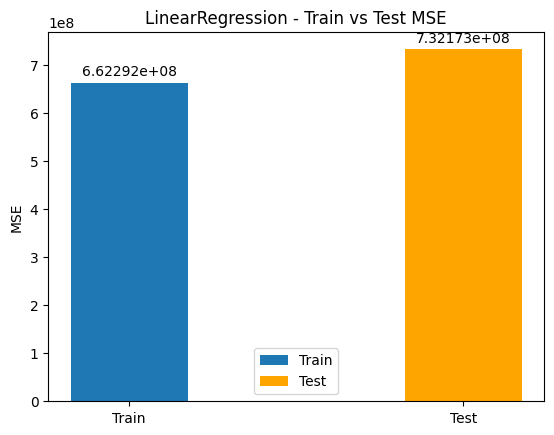

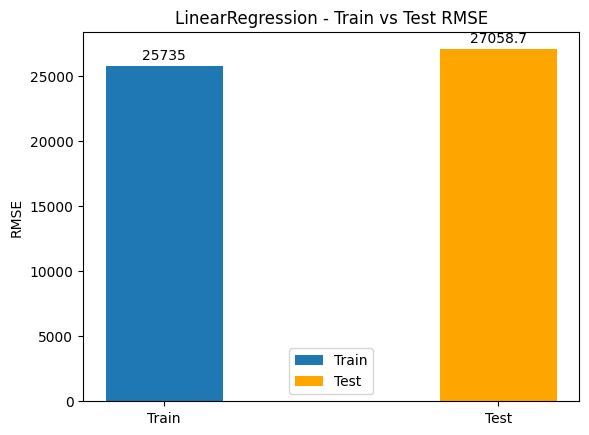

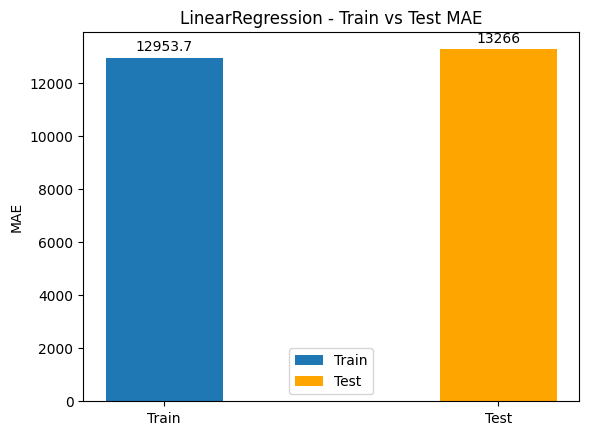

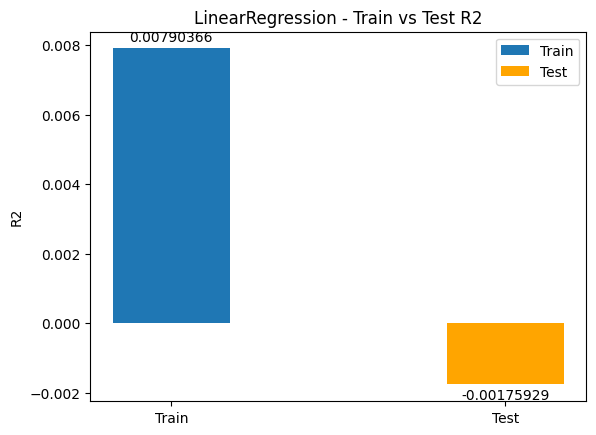

Execution time: 0.47894978523254395 seconds
model type == LinearRegression  ..END - valuate_regression_model func
model type == Ridge  ..STARRING - evaluate_regression_model func
Model: Ridge
The RMSE on train data is  25768.69897215833
The RMSE on test data is  27018.690390402622
The MSE on train data is  664025846.7177138
The MSE on test data is  730009630.412435
The MAE on train data is  12938.923094680307
The MAE on test data is  13220.131844970845
The R2 on train data is  0.0053066012169956656
The R2 on test data is  0.0012005077501956452
The Adjusted R2 on train data is  0.0027368259067727108
The Adjusted R2 on test data is  -0.004841971813045465


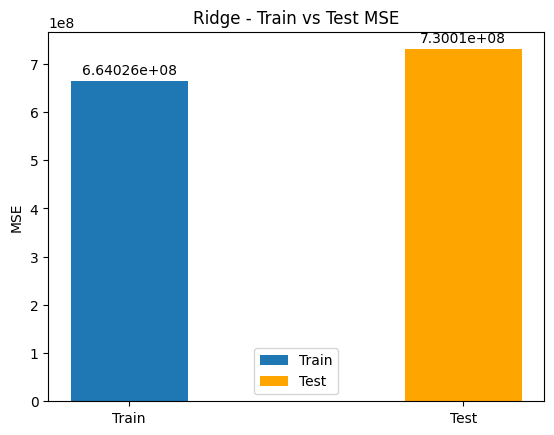

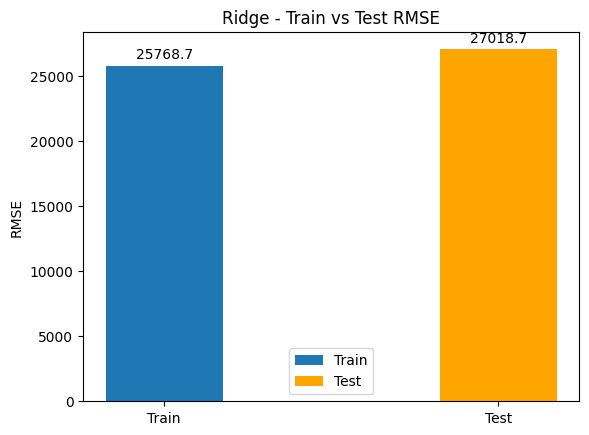

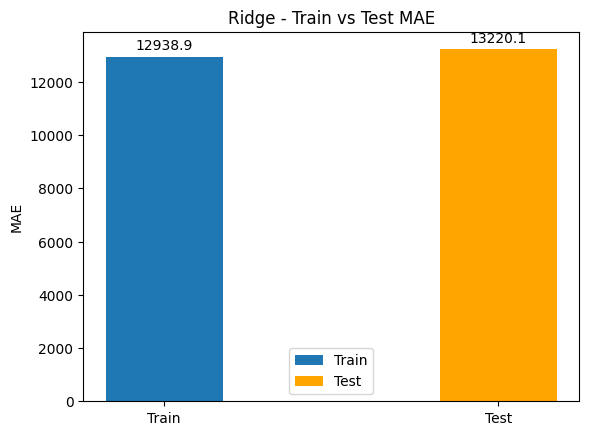

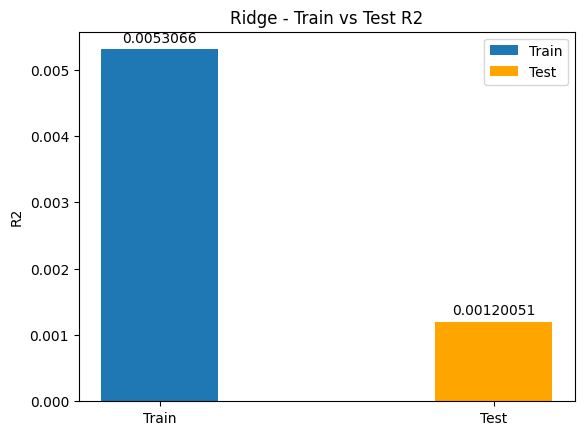

Execution time: 0.5013842582702637 seconds
model type == Ridge  ..END - valuate_regression_model func
model type == Lasso  ..STARRING - evaluate_regression_model func


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+12, tolerance: 5.927e+08

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.905e+12, tolerance: 5.889e+08

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

Model: Lasso
The RMSE on train data is  25784.97180313622
The RMSE on test data is  27011.62793186792
The MSE on train data is  664864770.8885299
The MSE on test data is  729628043.5296671
The MAE on train data is  12946.950507614747
The MAE on test data is  13218.349340628098
The R2 on train data is  0.004049914690537171
The R2 on test data is  0.0017225950883344998
The Adjusted R2 on train data is  0.0014768927497319506
The Adjusted R2 on test data is  -0.004316725981039049


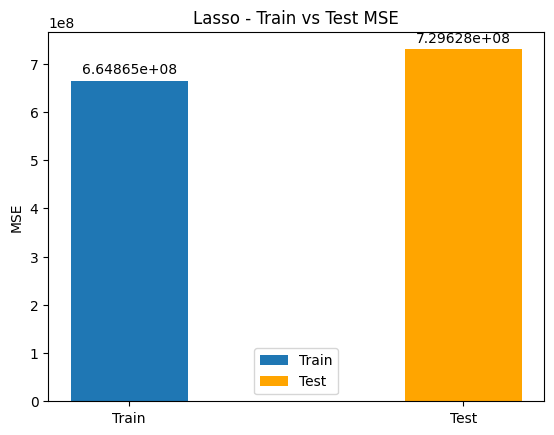

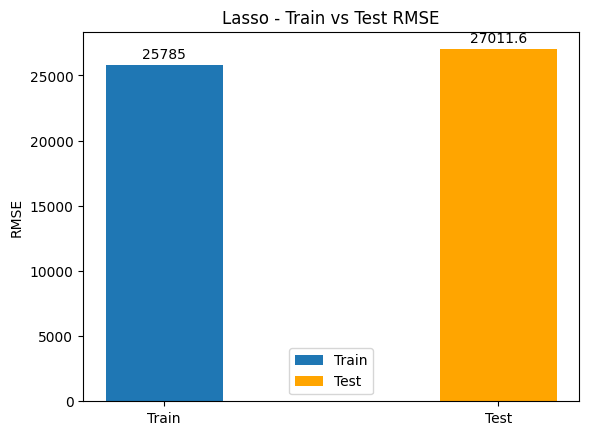

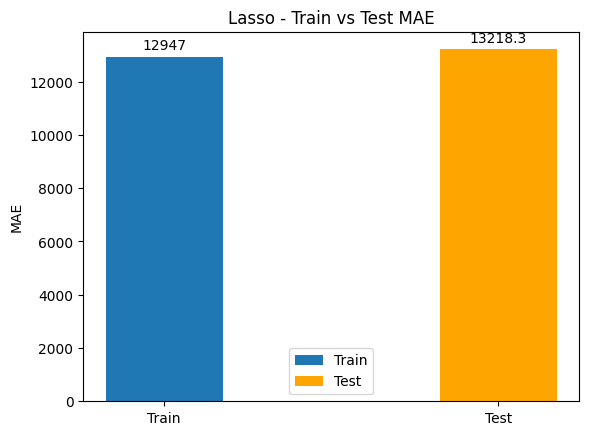

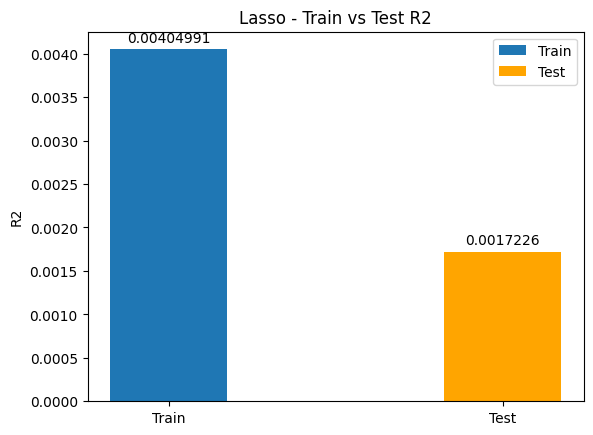

Execution time: 4.04642391204834 seconds
model type == Lasso  ..END - valuate_regression_model func
model type == DecisionTree  ..STARRING - evaluate_regression_model func
Model: DecisionTree
The RMSE on train data is  24902.247097152536
The RMSE on test data is  29230.975958159324
The MSE on train data is  620121910.4876419
The MSE on test data is  854449955.4664885
The MAE on train data is  11516.74778127684
The MAE on test data is  13301.157871298152
The R2 on train data is  0.07107355255557446
The R2 on test data is  -0.16905879884164787
The Adjusted R2 on train data is  0.06867368516671213
The Adjusted R2 on test data is  -0.17613130333833715


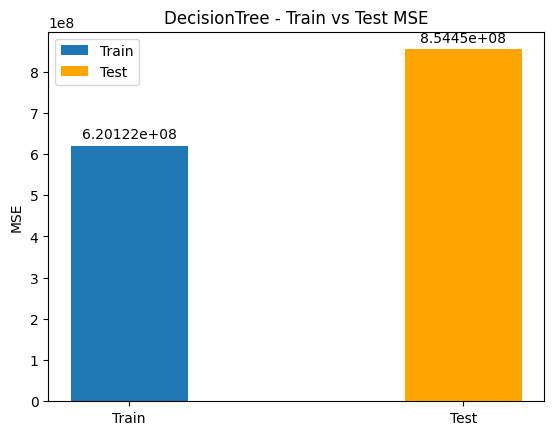

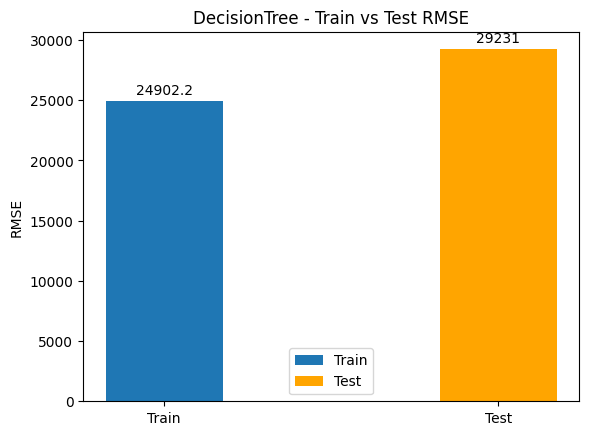

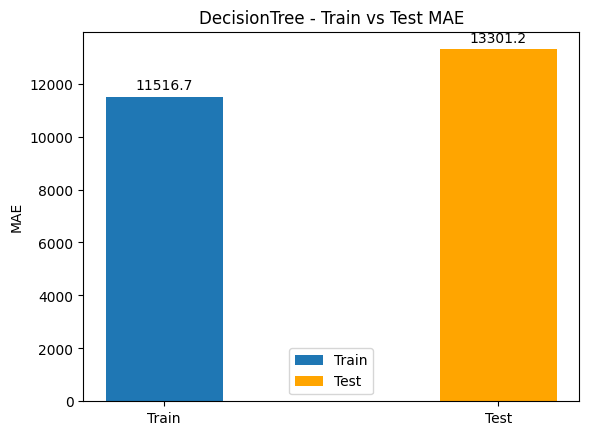

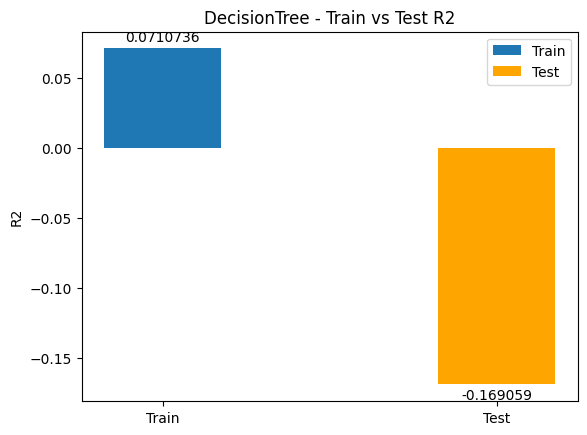

Execution time: 146.66729998588562 seconds
model type == DecisionTree  ..END - valuate_regression_model func
model type == KNeighbors  ..STARRING - evaluate_regression_model func
Model: KNeighbors
The RMSE on train data is  24397.11255319109
The RMSE on test data is  27872.64893821542
The MSE on train data is  595219100.9330744
The MSE on test data is  776884558.8330013
The MAE on train data is  12463.507100781651
The MAE on test data is  13831.481144106394
The R2 on train data is  0.10837731173531173
The R2 on test data is  -0.06293378960045204
The Adjusted R2 on train data is  0.10607381804254101
The Adjusted R2 on test data is  -0.06936426513691019


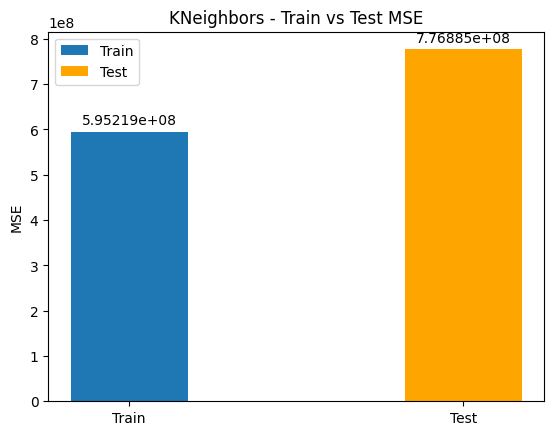

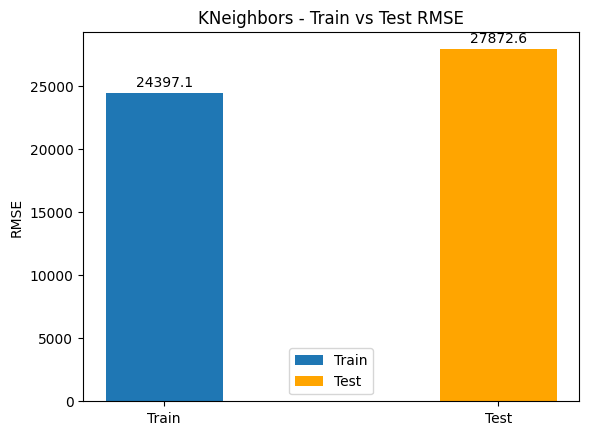

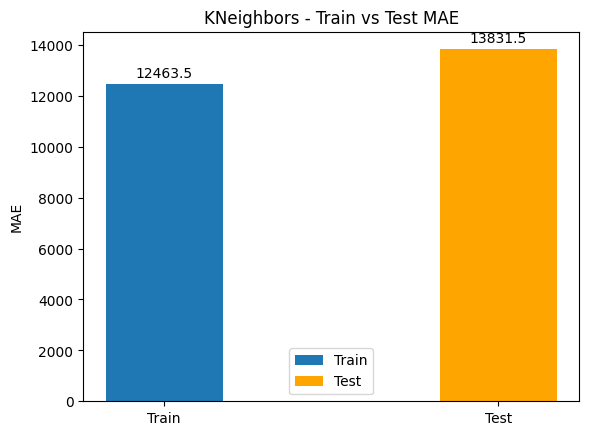

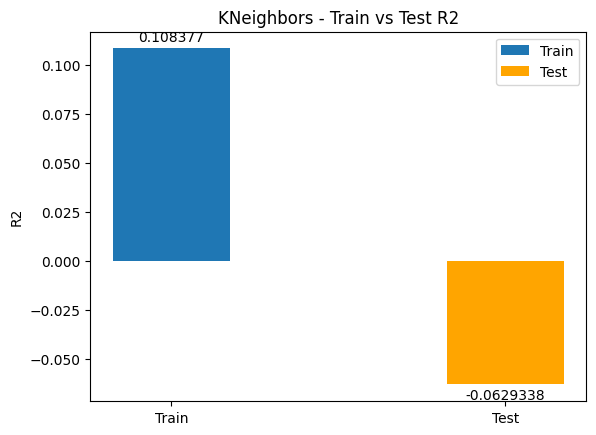

Execution time: 1.4398078918457031 seconds
model type == KNeighbors  ..END - valuate_regression_model func
model type == SVR  ..STARRING - evaluate_regression_model func
Model: SVR
The RMSE on train data is  25934.039693398114
The RMSE on test data is  27123.432899269097
The MSE on train data is  672574414.818749
The MSE on test data is  735680612.2411531
The MAE on train data is  12813.739367797378
The MAE on test data is  13076.075630902687
The R2 on train data is  -0.007498930828448103
The R2 on test data is  -0.006558532042034715
The Adjusted R2 on train data is  -0.010101789036501607
The Adjusted R2 on test data is  -0.012647951796714185


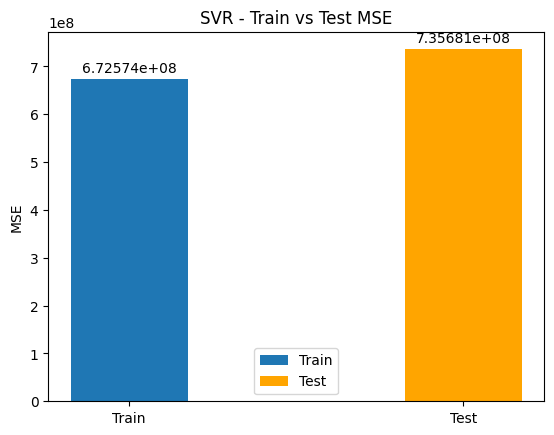

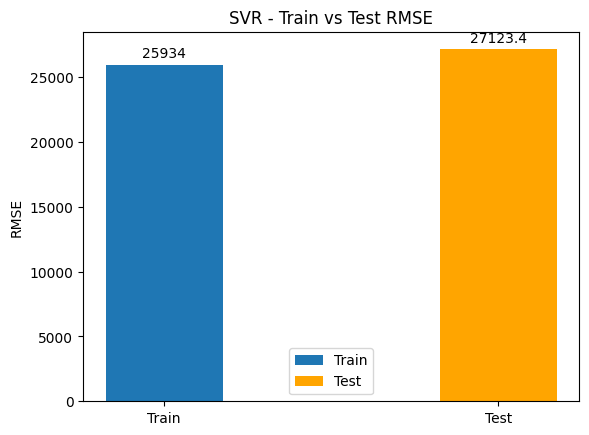

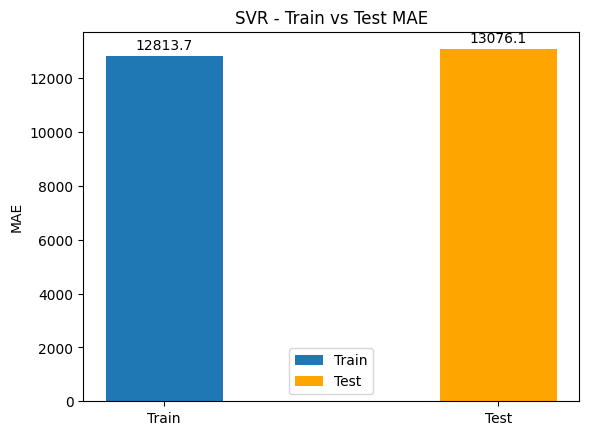

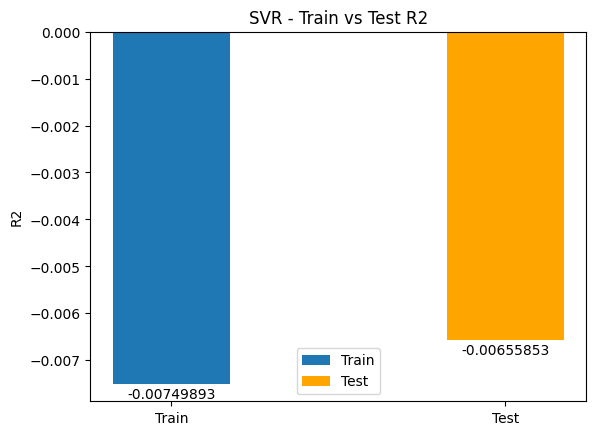

Execution time: 148.79405188560486 seconds
model type == SVR  ..END - valuate_regression_model func
model type == AdaBoost  ..STARRING - evaluate_regression_model func
Model: AdaBoost
The RMSE on train data is  25633.5456043609
The RMSE on test data is  27041.708911024998
The MSE on train data is  657078660.2508501
The MSE on test data is  731254020.8286088
The MAE on train data is  13005.566778259521
The MAE on test data is  13321.691989953377
The R2 on train data is  0.0157133053428391
The R2 on test data is  -0.0005020677557363573
The Adjusted R2 on train data is  0.013170415594897067
The Adjusted R2 on test data is  -0.006554847462078461


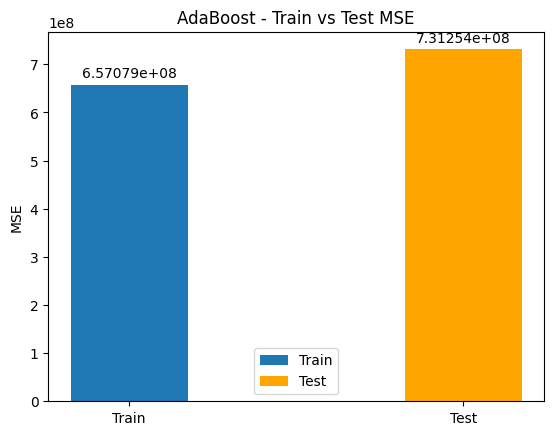

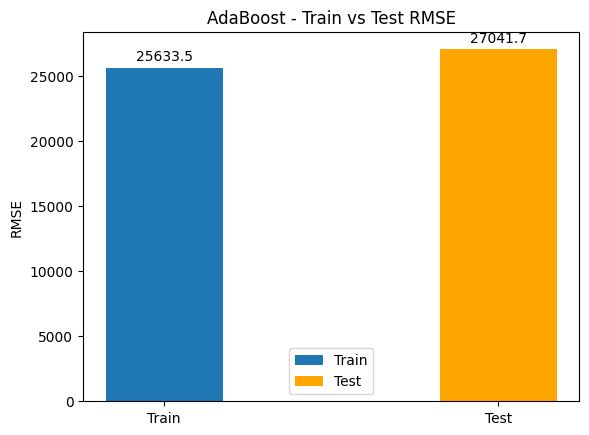

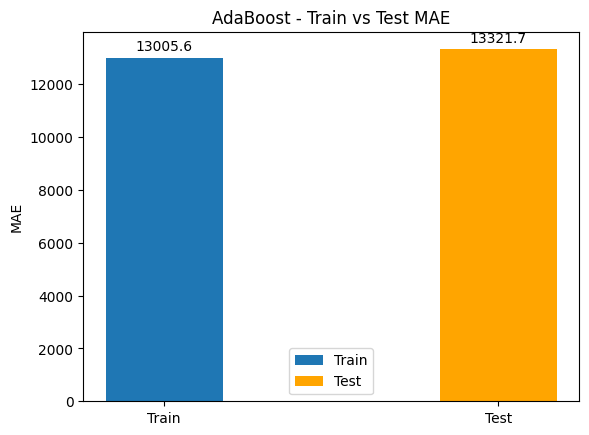

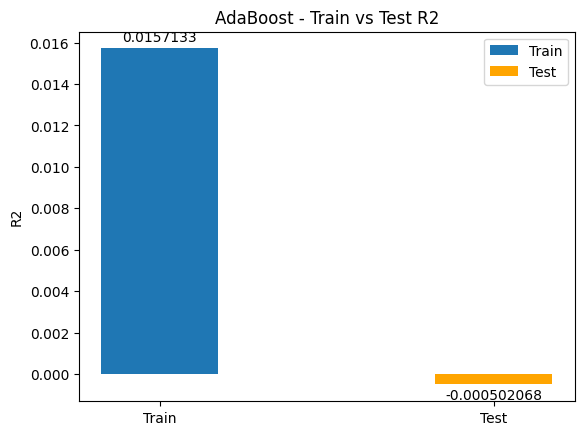

Execution time: 31.69267511367798 seconds
model type == AdaBoost  ..END - valuate_regression_model func
model type == XGBoost  ..STARRING - evaluate_regression_model func
Model: XGBoost
The RMSE on train data is  25656.105673051974
The RMSE on test data is  27005.72193425659
The MSE on train data is  658235758.3068097
The MSE on test data is  729309017.1903875
The MAE on train data is  12919.53593384686
The MAE on test data is  13212.21159854431
The R2 on train data is  0.013980002635276101
The R2 on test data is  0.002159087063799081
The Adjusted R2 on train data is  0.011432634926076268
The Adjusted R2 on test data is  -0.003877593341595764


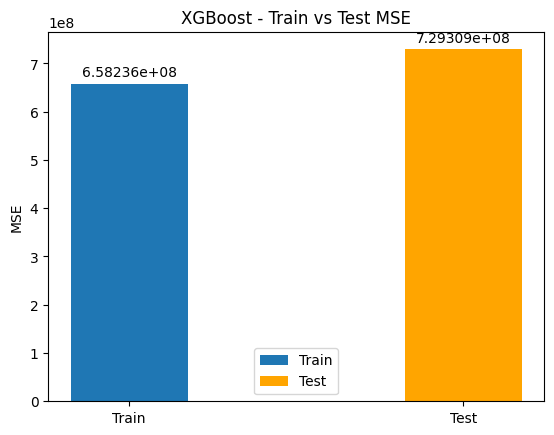

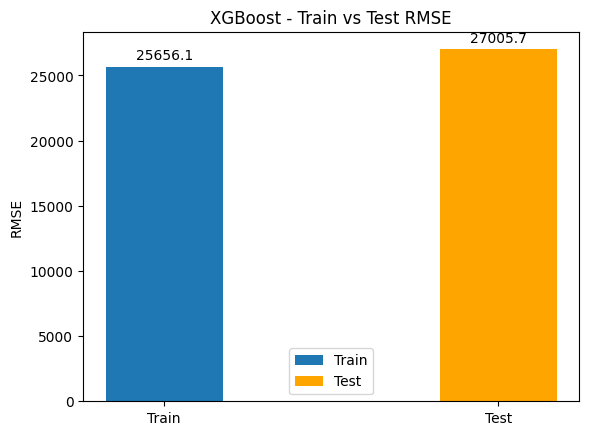

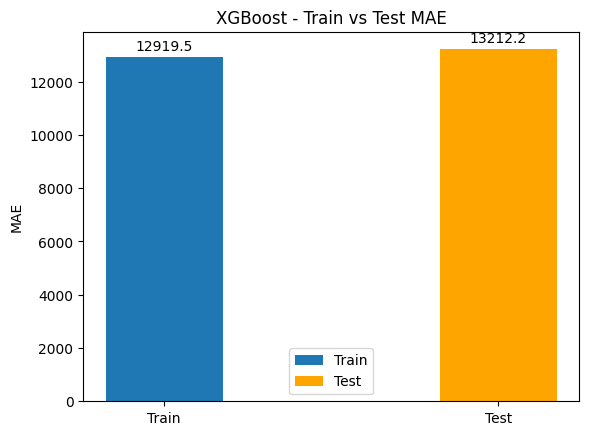

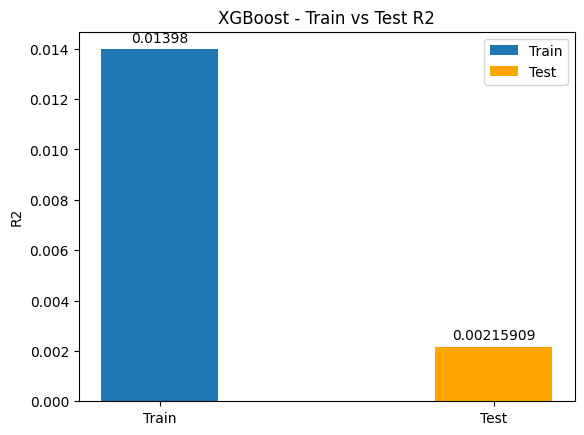

Execution time: 27.71149206161499 seconds
model type == XGBoost  ..END - valuate_regression_model func
model type == ensemble_ML  ..STARRING - evaluate_regression_model func
Model: ensemble_ML
The RMSE on train data is  25209.473844459135
The RMSE on test data is  26541.12346770574
The MSE on train data is  635517571.5144691
The MSE on test data is  704431234.9280005
The MAE on train data is  12497.556262220522
The MAE on test data is  13069.935263631167
The R2 on train data is  0.04801125389810068
The R2 on test data is  0.036196879521324554
The Adjusted R2 on train data is  0.04555180541042003
The Adjusted R2 on test data is  0.03036611898963637


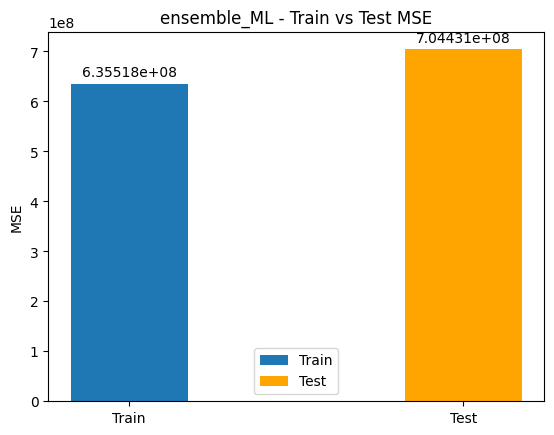

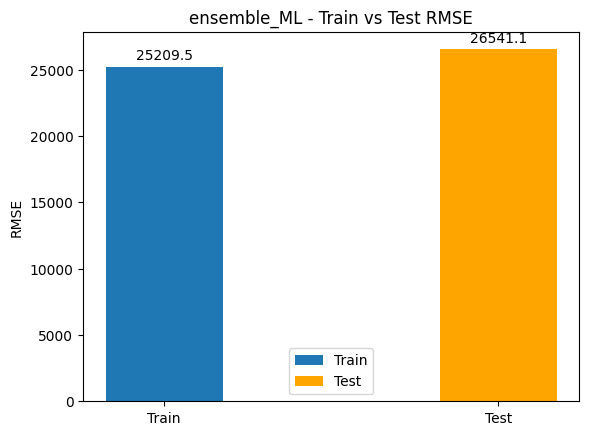

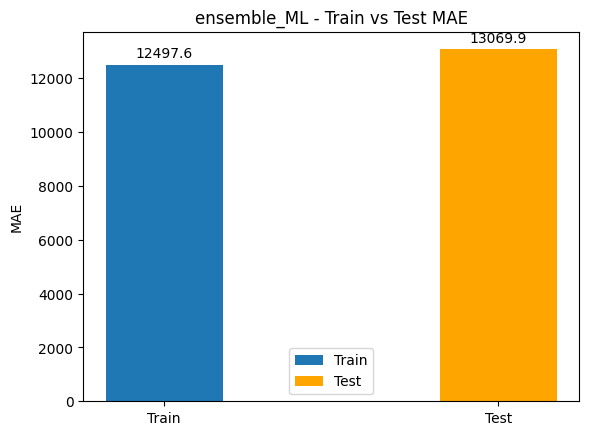

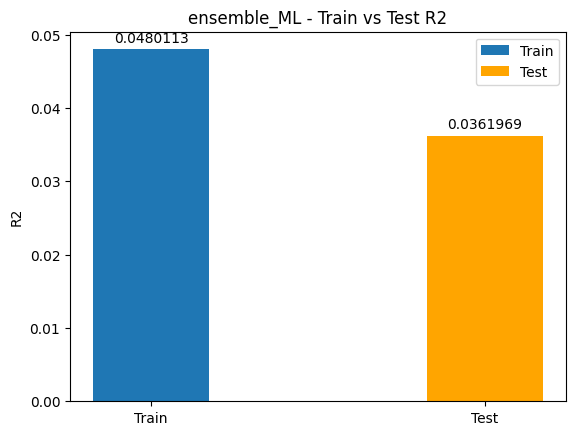

Execution time: 197.68360710144043 seconds
model type == ensemble_ML  ..END - valuate_regression_model func


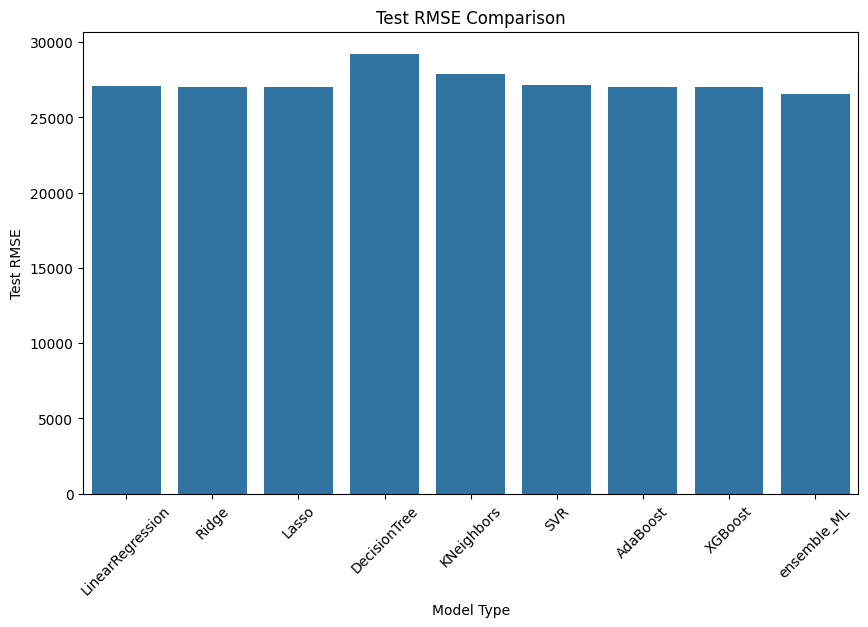

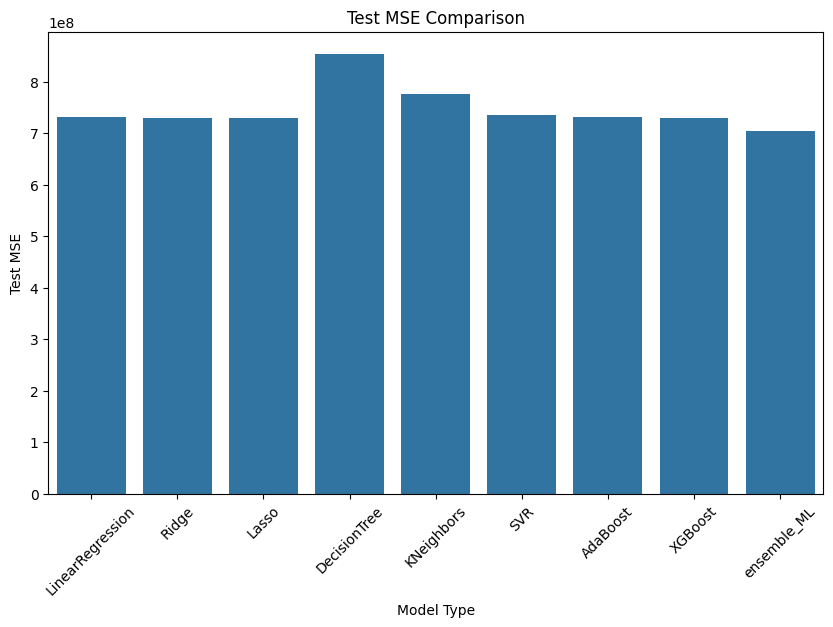

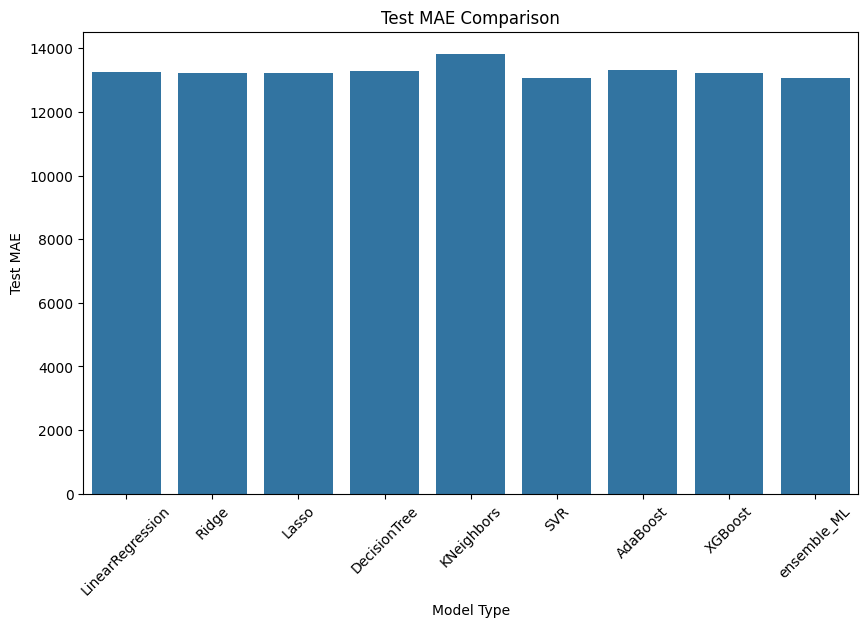

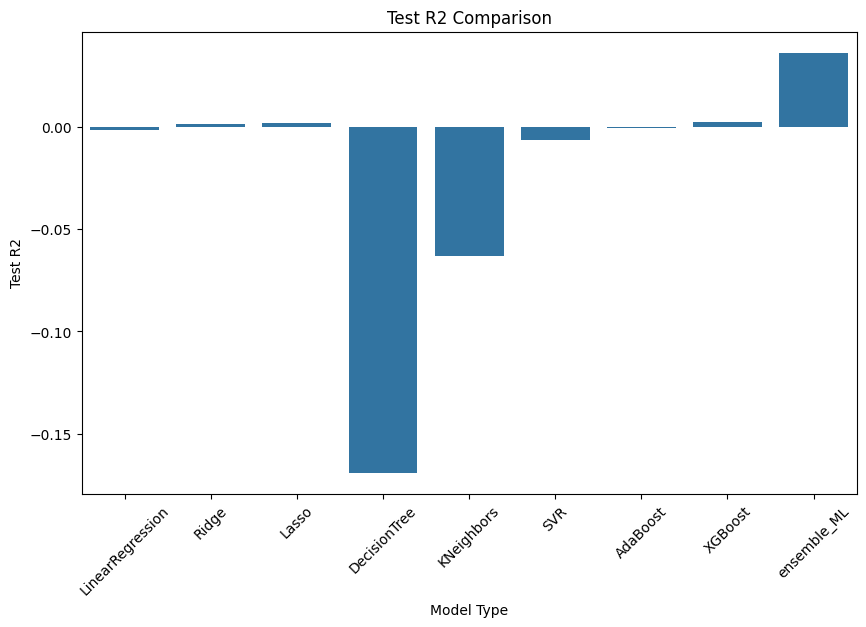

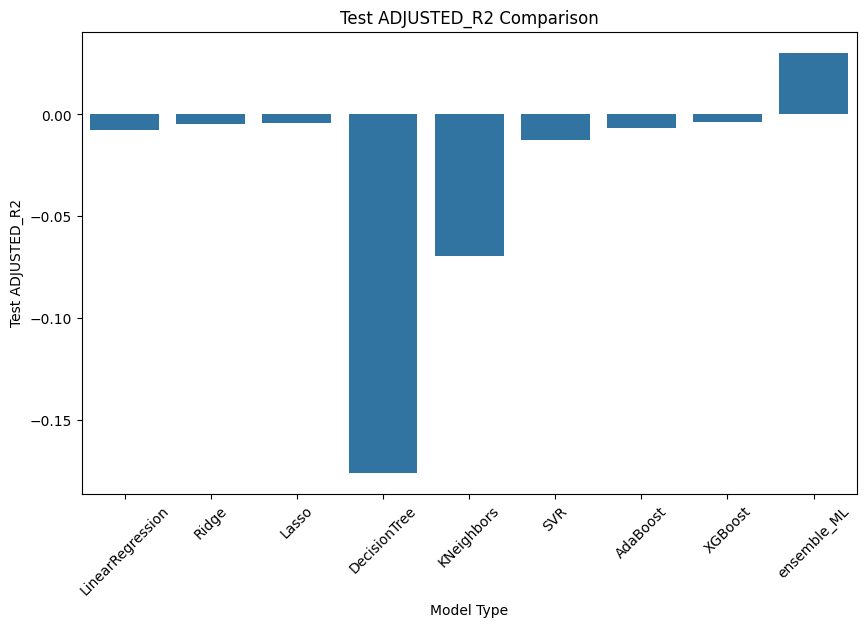

In [36]:

target_var = 'Initial Cost'
#feature_list = [col for col in ny_df.columns if col != 'Initial Cost']
feature_list = ['Job','Lot','Job Type','Proposed Zoning Sqft','Enlargement SQ Footage','year']
#models = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTree', 'RandomForest', 'KNeighbors', 'SVR', 'AdaBoost', 'XGBoost']
models = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTree',  'KNeighbors', 'SVR', 'AdaBoost', 'XGBoost'] # TAKE out random forest
# Run  for all models
evaluate_regression_models(models, ny_df, target_var, feature_list)